In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))

['DATAA.csv', 'DATAB.csv', 'DATAP.csv']


In [2]:
data = pd.read_csv("input/DATAA.csv")
data.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
0,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,700,82.575165,382.298959,229.700598,1350.8379,331.935067,9115.993
1,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,800,82.575165,437.164581,250.991074,1350.8379,331.935067,9115.993
2,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,900,82.575165,492.030203,272.277819,1350.8379,331.935067,9115.993
3,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1000,82.575165,546.895824,293.561646,1350.8379,331.935067,9115.993
4,47.9,6.3,0.32,0.01,44.27,1.2,300,500,640,750,700,1000,310,1100,82.575165,601.761446,314.843148,1350.8379,331.935067,9115.993


In [3]:
data.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07,1.401573e+07
mean,5.073650e+01,6.357413e+00,6.837198e-01,3.141880e-01,3.621252e+01,5.389959e+00,3.768662e+02,7.640361e+02,4.935072e+02,8.393881e+02,8.845013e+02,1.941243e+03,5.011551e+02,1.059920e+03,1.304983e+02,5.316026e+02,3.757514e+02,2.618675e+03,4.513002e+02,8.835885e+03
std,1.246807e+01,1.102066e+00,6.696785e-01,5.979850e-01,1.380436e+01,6.531735e+00,5.882173e+01,2.051557e+02,8.868562e+01,6.999506e+01,1.485674e+02,7.346937e+02,1.266460e+02,2.256766e+02,4.134717e+01,1.824659e+02,7.080347e+01,9.910552e+02,8.659531e+01,2.038759e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056070e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854212e+02,7.579587e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259479e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421637e+02,8.349870e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.467297e+02,6.566271e+02,4.287245e+02,3.377095e+03,5.089412e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,3.030000e+05,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [4]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  14015729
The number of columns in dataset is -  20


In [5]:
data.isnull().sum().sort_values(ascending = True)

Carbon        0
PCC_P         0
POWER         0
CO2_P         0
H2_P          0
LNG_MF        0
CARBONAT_T    0
CAOH2         0
Water_WGS     0
GASIF_T       0
PYROL_T       0
Steam_MF      0
Air_MF        0
Ash           0
Oxygen        0
Sulfur        0
Nitrogen      0
Hydrogen      0
EXERGY        0
HHV           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.3,random_state=40)

In [8]:
train.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06
mean,5.073525e+01,6.357317e+00,6.836755e-01,3.140572e-01,3.621472e+01,5.389031e+00,3.768761e+02,7.639910e+02,4.935459e+02,8.393985e+02,8.844945e+02,1.941137e+03,5.011613e+02,1.059895e+03,1.304945e+02,5.315980e+02,3.757374e+02,2.618532e+03,4.512963e+02,8.835667e+03
std,1.246695e+01,1.102038e+00,6.694664e-01,5.978828e-01,1.380309e+01,6.527968e+00,5.882911e+01,2.051644e+02,8.869657e+01,6.999614e+01,1.485505e+02,7.346598e+02,1.266564e+02,2.256662e+02,4.134815e+01,1.899792e+02,7.080158e+01,9.910075e+02,8.658220e+01,2.038683e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,6.000000e+02,3.397155e+01,0.000000e+00,1.708589e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056074e+02,4.371646e+02,3.259812e+02,1.688547e+03,3.854212e+02,7.579587e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259435e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421637e+02,8.349870e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.466868e+02,6.566271e+02,4.286744e+02,3.377095e+03,5.089412e+02,9.240596e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,3.030000e+05,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [9]:
test.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,LNG_MF,H2_P,CO2_P,POWER,PCC_P,EXERGY,HHV
count,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06,4.204719e+06
mean,5.073942e+01,6.357637e+00,6.838233e-01,3.144931e-01,3.620739e+01,5.392127e+00,3.768429e+02,7.641414e+02,4.934170e+02,8.393638e+02,8.845172e+02,1.941491e+03,5.011407e+02,1.059979e+03,1.305070e+02,5.316134e+02,3.757840e+02,2.619009e+03,4.513093e+02,8.836393e+03
std,1.247070e+01,1.102132e+00,6.701731e-01,5.982234e-01,1.380734e+01,6.540515e+00,5.880449e+01,2.051352e+02,8.866002e+01,6.999254e+01,1.486069e+02,7.347727e+02,1.266218e+02,2.257008e+02,4.134490e+01,1.635983e+02,7.080789e+01,9.911665e+02,8.662592e+01,2.038937e+03
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02,7.000000e+02,3.397155e+01,0.000000e+00,1.708610e+02,3.709642e+02,2.472574e+02,4.366628e+03
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02,9.000000e+02,1.056054e+02,4.371646e+02,3.261966e+02,1.688547e+03,3.854279e+02,7.579525e+03
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02,1.100000e+03,1.259594e+02,5.468958e+02,3.756242e+02,2.566592e+03,4.421665e+02,8.350085e+03
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02,1.300000e+03,1.468210e+02,6.566271e+02,4.288932e+02,3.377095e+03,5.089199e+02,9.241091e+03
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.400000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02,1.400000e+03,3.063698e+02,7.663589e+02,5.730766e+02,4.592849e+03,7.313827e+02,1.558403e+04


In [10]:


col_randoms = ["Carbon", "Hydrogen","Nitrogen","Sulfur","Oxygen","Ash","Air_MF","Steam_MF","PYROL_T", "GASIF_T","Water_WGS","CAOH2","CARBONAT_T"]
col_target = ["H2_P"]

In [11]:
feature_vars = train[col_randoms ]
target_vars = train[col_target]
feature_vars.shape
target_vars.shape

(9811010, 1)

In [12]:
feature_vars.describe()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T
count,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06,9.811010e+06
mean,5.073525e+01,6.357317e+00,6.836755e-01,3.140572e-01,3.621472e+01,5.389031e+00,3.768761e+02,7.639910e+02,4.935459e+02,8.393985e+02,8.844945e+02,1.941137e+03,5.011613e+02
std,1.246695e+01,1.102038e+00,6.694664e-01,5.978828e-01,1.380309e+01,6.527968e+00,5.882911e+01,2.051644e+02,8.869657e+01,6.999614e+01,1.485505e+02,7.346598e+02,1.266564e+02
min,2.885000e+01,3.685500e+00,0.000000e+00,0.000000e+00,3.160000e+00,2.000000e-01,3.000000e+02,5.000000e+02,3.700000e+02,7.000000e+02,6.100000e+02,3.080000e+02,3.100000e+02
25%,4.585000e+01,5.850000e+00,3.500000e-01,0.000000e+00,3.712170e+01,2.870000e+00,3.350000e+02,5.700000e+02,4.100000e+02,7.750000e+02,7.500000e+02,1.250000e+03,3.740000e+02
50%,4.790000e+01,6.130000e+00,4.000000e-01,0.000000e+00,4.200000e+01,3.200000e+00,3.700000e+02,7.900000e+02,4.900000e+02,8.500000e+02,8.550000e+02,1.900000e+03,5.020000e+02
75%,5.022000e+01,7.430000e+00,1.280000e+00,1.100000e-01,4.480000e+01,7.100000e+00,4.400000e+02,9.000000e+02,5.500000e+02,9.000000e+02,9.500000e+02,2.500000e+03,6.300000e+02
max,8.027000e+01,8.131200e+00,3.685500e+00,1.813500e+00,4.543000e+01,4.150000e+01,4.750000e+02,1.100000e+03,6.500000e+02,9.750000e+02,1.200000e+03,3.400000e+03,6.940000e+02


In [13]:
target_vars.describe()

,H2_P
count,9.811010e+06
mean,1.304945e+02
std,4.134815e+01
min,3.397155e+01
25%,1.056074e+02
50%,1.259435e+02
75%,1.466868e+02
max,3.063698e+02


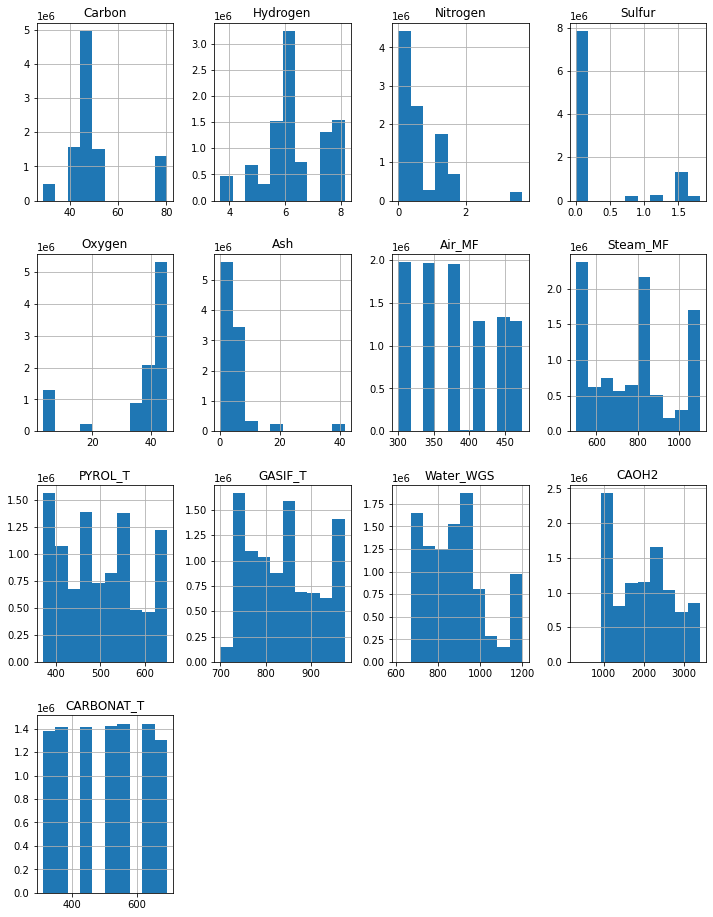

In [14]:
feature_vars.hist(bins = 10 , figsize= (12,16)) ;
plt.savefig("out.png")

<AxesSubplot:>

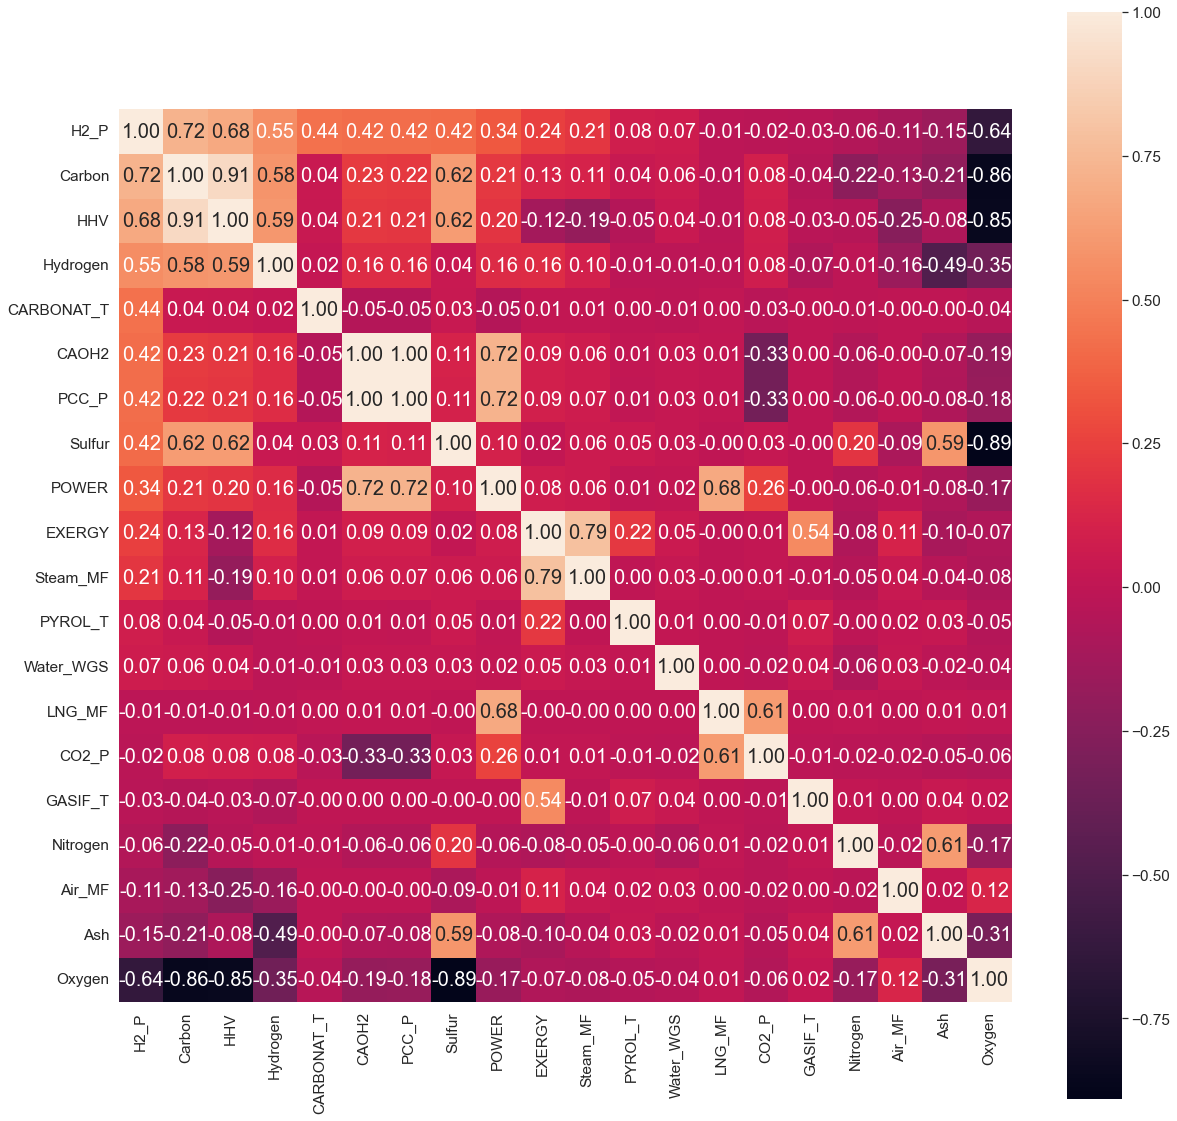

In [16]:
from matplotlib import rcParams
train_corr = train[col_randoms]
rcParams['figure.figsize'] = 20,20
corr_matrix = train.corr()
column_ind = corr_matrix.nlargest(20, 'H2_P')['H2_P'].index
cm = np.corrcoef(train[column_ind].values.T)
sns.set(font_scale=1.4)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=column_ind.values, xticklabels=column_ind.values)

In [17]:
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
train_X.shape

(9811010, 13)

In [18]:
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]
test_X.shape

(4204719, 13)

In [19]:
train_X.columns


Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T', 'Water_WGS', 'CAOH2', 'CARBONAT_T'],
      dtype='object')

In [20]:
test_X.columns

Index(['Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Ash', 'Air_MF',
       'Steam_MF', 'PYROL_T', 'GASIF_T', 'Water_WGS', 'CAOH2', 'CARBONAT_T'],
      dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values) + col_target ]
test = test[list(test_X.columns.values) + col_target ]
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [22]:
sc_train.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,H2_P
4134599,-0.391856,-0.206269,-0.498420,-0.525282,0.621982,-0.385883,-0.116883,0.175513,-0.716442,0.580053,0.777550,-0.464347,0.511926,-0.132543
4446075,-0.391856,-0.206269,-0.498420,-0.525282,0.621982,-0.385883,-1.306770,-1.286729,1.651181,0.151458,-0.568793,0.420417,-0.498682,-0.330946
12976104,2.369044,0.973363,-0.334110,2.117376,-2.394734,0.262098,-1.306770,1.637754,-0.716442,-0.920030,-0.232207,-1.281051,1.522534,3.028182
10024606,-0.556291,-1.304235,1.249241,-0.240946,-0.153206,0.323373,-0.711827,-0.068194,0.636486,-1.277192,-1.040013,-0.055994,0.006622,0.017094
3399129,-0.156257,1.609639,1.003074,-0.525282,0.167475,-0.335331,-0.711827,-1.286729,1.312949,-0.191418,-0.568793,0.488475,-1.003986,-0.142870


In [23]:
sc_test.head()

,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T,H2_P
3697787,-0.392073,-0.206543,-0.498115,-0.525712,0.622322,-0.385616,-1.306753,1.637255,0.017855,1.223505,-0.905188,-1.281336,1.523113,-0.164469
9038484,0.254315,-0.227430,-0.482627,-0.525712,0.066219,-0.442186,-0.711560,-0.800162,-1.392025,-1.276761,0.440644,-1.281336,-0.498656,-0.600071
7893345,-0.563675,-0.460596,-1.005447,-0.525712,0.648395,-0.018672,-0.711560,0.662288,0.638203,0.509143,0.440644,-1.281336,-0.498656,-0.557317
3602138,-0.156545,1.609211,1.001796,-0.525712,0.167955,-0.335161,-0.711560,0.174805,0.976574,-0.190931,1.113561,1.304498,-0.498656,1.011686
13718492,2.367997,0.972990,-0.333978,2.115442,-2.393466,0.261122,-1.306753,1.637255,-0.376911,0.866324,1.450019,0.766917,1.017671,3.608382


In [24]:
train_X =  sc_train.drop(['H2_P'] , axis=1)

test_X =  sc_test.drop(['H2_P'] , axis=1)
#test_y = sc_test['H2_P']

In [25]:
train_X.head()


,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Ash,Air_MF,Steam_MF,PYROL_T,GASIF_T,Water_WGS,CAOH2,CARBONAT_T
4134599,-0.391856,-0.206269,-0.498420,-0.525282,0.621982,-0.385883,-0.116883,0.175513,-0.716442,0.580053,0.777550,-0.464347,0.511926
4446075,-0.391856,-0.206269,-0.498420,-0.525282,0.621982,-0.385883,-1.306770,-1.286729,1.651181,0.151458,-0.568793,0.420417,-0.498682
12976104,2.369044,0.973363,-0.334110,2.117376,-2.394734,0.262098,-1.306770,1.637754,-0.716442,-0.920030,-0.232207,-1.281051,1.522534
10024606,-0.556291,-1.304235,1.249241,-0.240946,-0.153206,0.323373,-0.711827,-0.068194,0.636486,-1.277192,-1.040013,-0.055994,0.006622
3399129,-0.156257,1.609639,1.003074,-0.525282,0.167475,-0.335331,-0.711827,-1.286729,1.312949,-0.191418,-0.568793,0.488475,-1.003986


In [26]:
train_y.head()

,H2_P
4134599,125.014138
4446075,116.810541
12976104,255.704245
10024606,131.201349
3399129,124.587146


In [27]:
from sklearn.ensemble import ExtraTreesRegressor


In [28]:
models = [
     #      ['Lasso: ', Lasso()],
     #      ['Ridge: ', Ridge()],
     #      ['ElasticNet: ', ElasticNet()],
     #      ['BayesianRidge: ', BayesianRidge()],
     #      ['TweedieRegressor: ', TweedieRegressor()],
     #      ['RANSACRegressor: ', RANSACRegressor()],
     #      ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
    #       ['SVR:' , SVR(kernel='rbf')],
     #      ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
     #      ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
     #      ['XGBRegressor: ', xgb.XGBRegressor()] ,
     #      ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [29]:
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 80
    curr_model_data["Name"] = name
    curr_model.fit(train_X,train_y)
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [30]:
model_data

[{'Name': 'ExtraTreeRegressor :',
  'Train_R2_Score': 0.9999997766778778,
  'Test_R2_Score': 0.9999972428712222,
  'Test_RMSE_Score': 0.06865156322425436}]

In [31]:
df1 = pd.DataFrame(model_data)
df1

,Name,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,ExtraTreeRegressor :,1.0,0.999997,0.068652


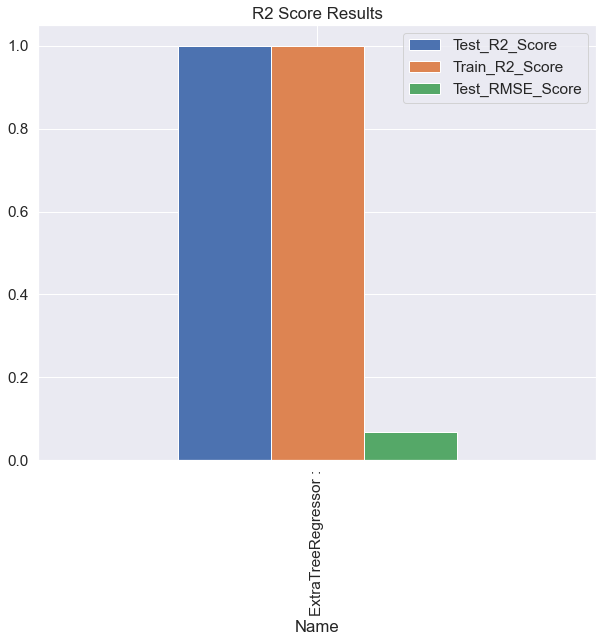

In [32]:
df1.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [33]:
from plotly.offline import  init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80],
              'n_estimators' : [100],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 100}

In [ ]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, random_state=40)

In [ ]:
grid_search.best_estimator_.score(train_X,train_y)

0.9999997766778689

In [ ]:
grid_search.best_estimator_.score(test_X,test_y)

0.9999898392364633

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.1317907948710567

In [ ]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

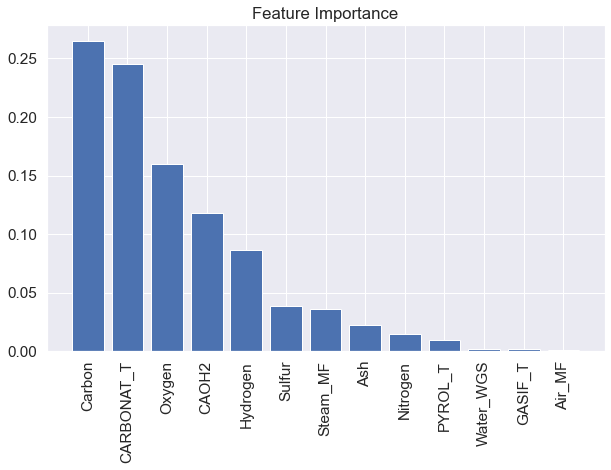

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices])
plt.xticks(range(train_X.shape[1]), names, rotation=90)
plt.show()

In [ ]:
names[0:5]

['Carbon', 'CARBONAT_T', 'Oxygen', 'CAOH2', 'Hydrogen']

In [ ]:
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [ ]:
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, random_state=40)

In [ ]:
print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9568180136987456
Testing set R2 Score -  0.9568438222038298
Testing set RMSE Score -  8.589015607839842
